In [1]:
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(ROOT)

In [2]:
os.listdir()

['Untitled0.ipynb',
 'Demo_001_Understanding_Image_and_CV_Basic.ipynb',
 'car1.jpeg']

In [3]:
img_path = "car1.jpeg"

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [5]:
car1 = mpimg.imread(img_path)

In [6]:
car1.shape

(168, 300, 3)

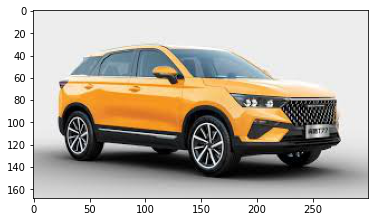

In [8]:
plt.imshow(car1)

In [9]:
car1[0][0]

array([237, 237, 237], dtype=uint8)

In [10]:
type(car1)

numpy.ndarray

In [11]:
car1_cv2 = cv2.imread(img_path)

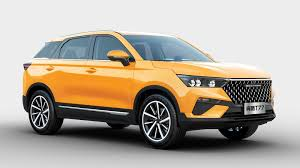

In [16]:
from google.colab.patches import cv2_imshow
cv2_imshow(car1_cv2)

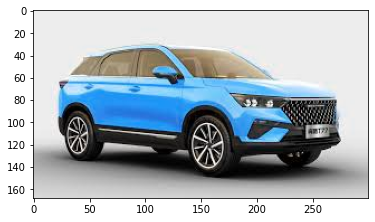

In [18]:
plt.imshow(car1_cv2) # CV2 read image as BGR and in Matplotlib reads as RGB

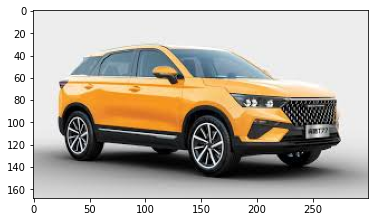

In [19]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2,cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

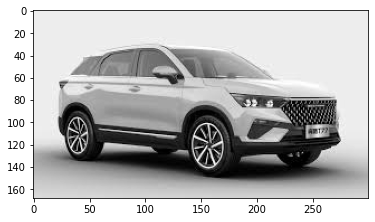

In [20]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2,cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY,cmap="gray") # CONVERT BLACK-WHITE

In [21]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [22]:
car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max()

(0, 255)

# COMPOSITION OF COLOR IMAGE

In [40]:
def visualize_RGB_channel(imgArray=None, figsize=(10,7)):
  # SPLITTING RGB COMPONENTS
  R, G, B = cv2.split(imgArray)

  # CREATE ZERO MATIRX OF SHAPE OF IMAGE
  Z = np.zeros(R.shape, dtype=R.dtype)

  # INIT SUBPLOT
  fig, ax = plt.subplots(2,2, figsize=figsize)

  # PLOTING ORIGINAL IMAGE OR RGB IMAGES
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original Image")
  ax[0,0].imshow(cv2.merge((R, G, B)))  
  
  ax[0,1].set_title("Red CH Image")
  ax[0,1].imshow(cv2.merge((R, Z, Z)))

  ax[1,0].set_title("Green CH Image")
  ax[1,0].imshow(cv2.merge((Z, G, Z)))

  ax[1,1].set_title("Blue CH Image")
  ax[1,1].imshow(cv2.merge((Z, Z, B)))



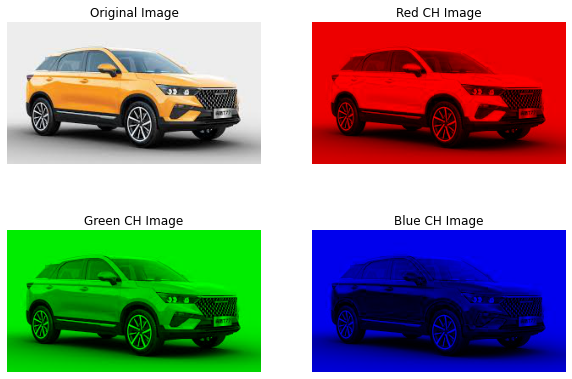

In [41]:
visualize_RGB_channel(imgArray=car1)

In [42]:
# RANDOM COLOR IMAGE
random_colored_img = np.random.randint(0,255,(6,6,3))
random_colored_img.shape

(6, 6, 3)

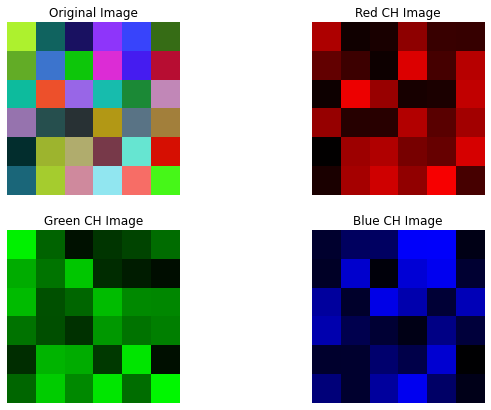

In [43]:
visualize_RGB_channel(random_colored_img)

In [45]:
random_colored_img

array([[[173, 241,  46],
        [ 16,  99,  95],
        [ 25,  17,  97],
        [142,  53, 250],
        [ 56,  68, 251],
        [ 54, 108,  21]],

       [[ 98, 172,  38],
        [ 60, 116, 205],
        [ 13, 198,  10],
        [220,  44, 213],
        [ 69,  28, 240],
        [183,  13,  50]],

       [[ 13, 187, 157],
        [237,  80,  43],
        [152, 102, 231],
        [ 23, 188, 173],
        [ 27, 137,  54],
        [193, 135, 183]],

       [[150, 115, 174],
        [ 38,  79,  78],
        [ 40,  49,  52],
        [178, 152,  21],
        [ 89, 115, 133],
        [162, 127,  59]],

       [[  2,  45,  45],
        [157, 180,  46],
        [176, 172, 109],
        [119,  57,  73],
        [102, 229, 209],
        [214,  15,   2]],

       [[ 26, 102, 121],
        [165, 204,  46],
        [207, 137, 157],
        [145, 230, 240],
        [247, 109, 102],
        [ 70, 247,  24]]])

UNDERSTANDING FILTER

In [48]:
sobel = np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])
print("HIGHLIGHTING VERTICALE EDGES :\n",sobel)

HIGHLIGHTING VERTICALE EDGES :
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [49]:
print("HIGHLIGHTING HORIZONTAL EDGES :\n",sobel.T)


HIGHLIGHTING HORIZONTAL EDGES :
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [51]:
example1 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example1 = np.array(example1)

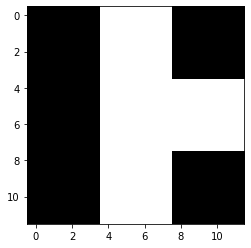

In [53]:
plt.imshow(example1,cmap="gray")

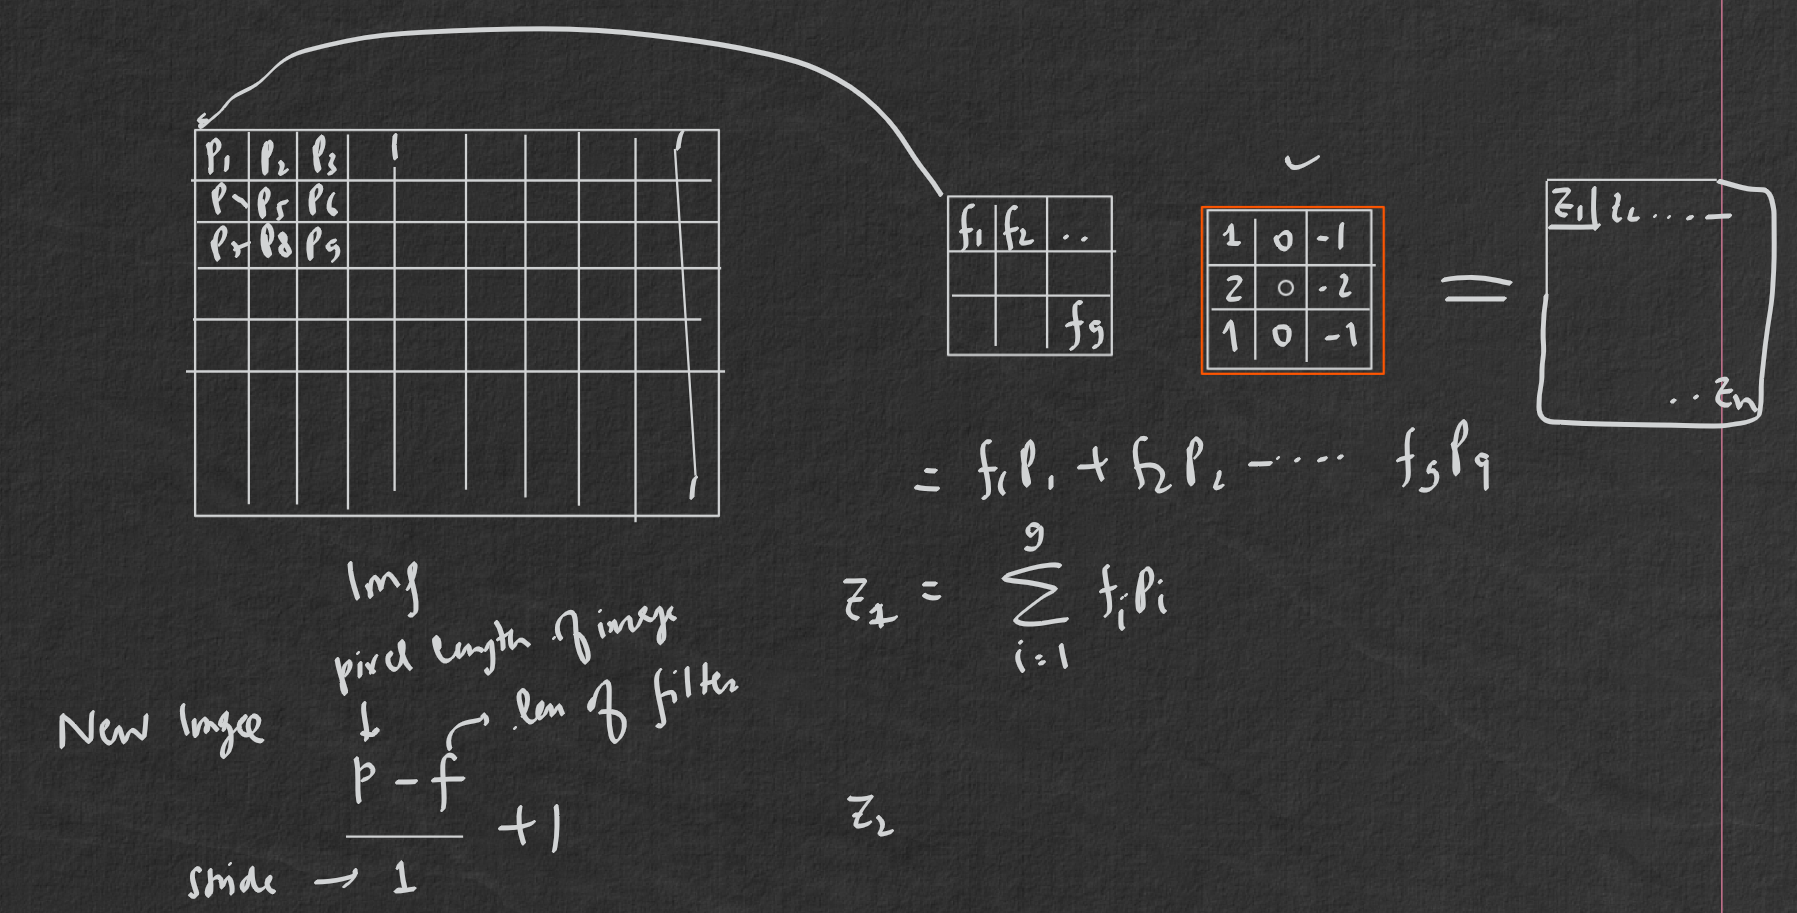

In [75]:
def simple_conv(imgFilter=None, picture=None):

  # EXTRACT THE SHAPE OF THE IMAGE
  p_row, p_col = picture.shape

  k = imgFilter.shape[0]  # k = 3

  temp = list()

  stride = 1

  # resultant image size
  final_rows = (p_row - k)//stride +1
  final_cols = (p_col - k)//stride +1

  # take VERTICALE down stride across row by p_row
  for v_stride in range(final_rows):
    # take VERTICALE down stride across row by p_row
    for h_stride in range(final_cols):
      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      z = sum(sum(imgFilter * target_area_of_pic))
      temp.append(z)

  resulant_image = np.array(temp).reshape(final_rows,final_cols)
  return resulant_image

In [76]:
example1

array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

In [77]:
sobel

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [78]:
k = 3
v_stride = 0
h_stride = 0 + 1 + 1
target_area = example1[v_stride: v_stride + k, h_stride: h_stride + k]
target_area

array([[  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255]])

In [79]:
sum(sum(target_area*sobel))


-1020

In [80]:
result = simple_conv(imgFilter=sobel, picture=example1)
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

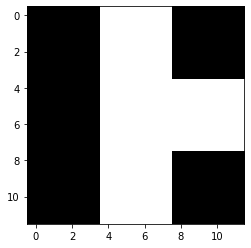

In [81]:
plt.imshow(example1,cmap="gray")

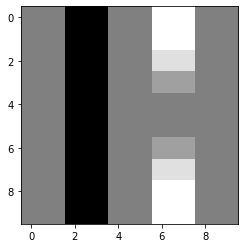

In [82]:
plt.imshow(result, cmap="gray")

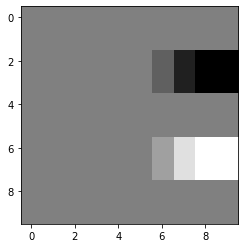

In [83]:
result = simple_conv(imgFilter=sobel.T, picture=example1)
plt.imshow(result, cmap="gray")

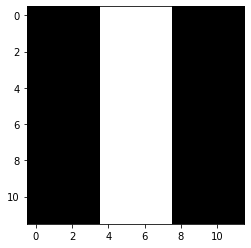

In [84]:
example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example2 = np.array(example2)
plt.imshow(example2, cmap="gray")

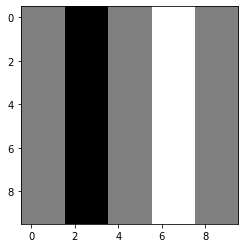

In [85]:
result = simple_conv(imgFilter=sobel, picture=example2)
plt.imshow(result, cmap="gray")

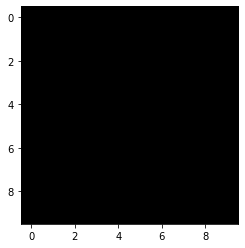

In [86]:
result = simple_conv(imgFilter=sobel.T, picture=example2)
plt.imshow(result, cmap="gray")

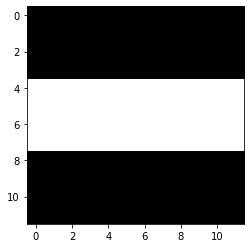

In [87]:
example2 = np.array(example2.T)
plt.imshow(example2, cmap="gray")

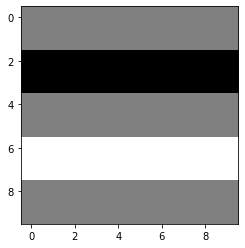

In [88]:
result = simple_conv(imgFilter=sobel.T, picture=example2)
plt.imshow(result, cmap="gray")

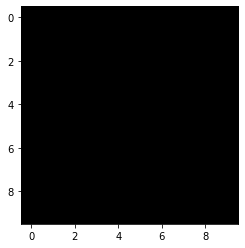

In [89]:
result = simple_conv(imgFilter=sobel, picture=example2)
plt.imshow(result, cmap="gray")

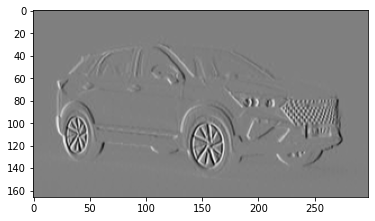

In [91]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

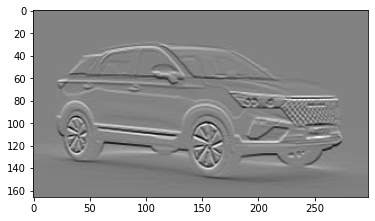

In [93]:
result = simple_conv(imgFilter=sobel.T, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [94]:
car1_cv2_BGR_GRAY.shape

(168, 300)

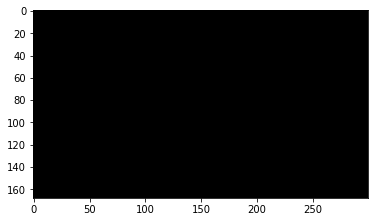

In [95]:
nothing = np.zeros(car1_cv2_BGR_GRAY.shape)
plt.imshow(nothing, cmap="gray")

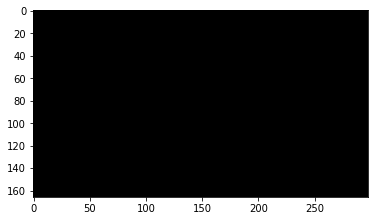

In [96]:
result = simple_conv(imgFilter=sobel.T, picture=nothing)
plt.imshow(result, cmap="gray")

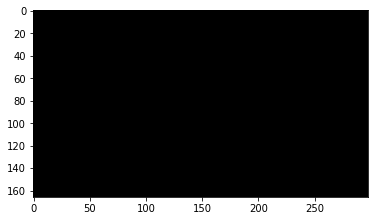

In [97]:
result = simple_conv(imgFilter=sobel, picture=nothing)
plt.imshow(result, cmap="gray")

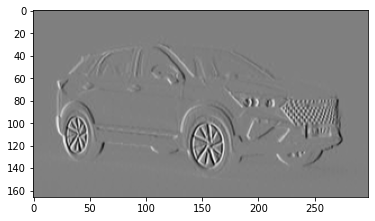

In [98]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [99]:
random_f = np.random.randn(3,3)
random_f

array([[-1.01465255,  2.01029803,  0.00287461],
       [-1.31023872,  0.11961507,  1.48906829],
       [ 2.54290316,  1.35641729, -1.19251464]])

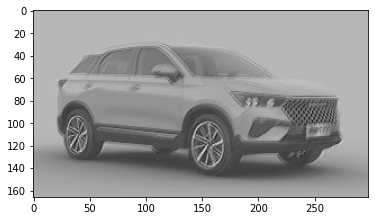

In [100]:
result = simple_conv(imgFilter=random_f, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")